# Scoping

### Project Goals

This project is designed to utilize the skills I have learned and apply machine learning techniques to a data set. I went into this project blind and thus this project is meant to outline my method to understand and refine a dataset from scratch and derive insights from it. The initial guidance I recieved was to decide a research question at this point but without understanding the contents of a dataset, its limits and quirks, that would in my humble opinion be impossible to do.

### Methodology

My Method is inspired by the one provided in: {insert book title here} (which is available neatly in appendix B pg. 497). 

However, against the apparent rigid and formulaic nature of the method provided therin I prefer to keep my processes iterative (recursive in a way) and dynamic. The format of this document may lead to you believe that I have gone about this project in clear steps and stages but this is mostly a function of the need for presentability and concistency. The process here is iterative and dynamic.
    
(Especially between the cleaning and exploratitory parts there is a lot of back and forth in understanding and refining the dataset to a state of usability I deem acceptable.)

1. Preliminary Analysis- Preparation for test integrity and studying of each attribute, its noisiness, distribution and possible usefulness for the task ahead.
2. Cleaning Data - serves primarily as a cleaning of the dataset but also as an initial analysis of each of the attributes. (This is exhaustive but also good practice in refining a dataset)
3. Exploratory Analysis - Explore the datasets relationships and patterns (Note: this is done after the clean so as to not have the exploration biased by missing values, incorrect inputs e.tc )
4. Framing - Decide and Assess an objective, think about what a solution would look like, how I would measure its performance and list assumptions.
5. Experimentation and refienment - testing models, validating them and evaluating them.
6. Presentation and Interpretation - show the results and interpet them in the context of the research question

The primary research question that I have detemerined to be answered is that of whether

### Assumptions


# Import Python Modules
First things first is to import the python modules I will be using for this project.

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Preliminary Analysis

### Loading the Data

The first step I take is to load the provided data into a pandas DataFrame object so that it can be efficiently explored and manipulated in python.

This involves the file `profiles.csv` being loaded into the `profiles` DataFrame. It is subsequently displayed for examination.

In [151]:
df = pd.read_csv('profiles.csv', encoding = 'utf-8')
df.reset_index()
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\r\n<br />\r\ni would love to t...,currently working as an international agent fo...,making people laugh.<br />\r\nranting about a ...,"the way i look. i am a six foot half asian, ha...","books:<br />\r\nabsurdistan, the republic, of ...",food.<br />\r\nwater.<br />\r\ncell phone.<br ...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\r\ny...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\r\...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\r\nconversation<br />\r\ncreati...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\r\nlynch,...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\r\nhttp://b...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\r\nat t...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


Straight away I can tell there is no point in looking at the value counts of the `essay{number}` columns as they are more likely infinitely variable, will not have any repeating entries and this project doesn't involve NLP. Let's drop them immediately.

In [152]:
essays = [f'essay{i}' for i in range(0, 10, 1)]
df.drop(essays, axis = 1, inplace = True)

### Identifying the Data Characteristics

First it is advisable to look at the data types and columns presented to us in the data and determine how much data we are dealing with exactly.

Doing a few simple calls to variables of the dataframe reveals that our dating profiles data consists of 59,946 rows (or users) and 31 attributes/columns.

Each column's name is sort of self descriptive of what sort of information is expected therein so there is no need to elaborate them here, any nuance within them will be explained in further parts.

In [153]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  last_online  59946 non-null  object 
 11  location     59946 non-null  object 
 12  offspring    24385 non-null  object 
 13  orientation  59946 non-null  object 
 14  pets         40025 non-null  object 
 15  religion     39720 non-null  object 
 16  sex          59946 non-null  object 
 17  sign         48890 non-null  object 
 18  smokes       54434 non-null  object 
 19  spea

### Setting Asside A Sample Test Set

This ensures we keep data snooping bias out of our project! The dataset is quite large so I am assuming there is no need for stratefied sampling.

In [154]:
train_set, test_set = train_test_split(df, test_size = 0.1, random_state = 10)
profiles = train_set.copy()

# Data Cleaning

First up is to clean the data and make sure it is suitable for use. My cleaning process for a single dataset consists of five steps:


1. Handling duplicates and rows
2. Simplifying and standardizng attributes 
3. Handling missing values
4. Handling outliers
5. Handling inconsitent attributes 

## Handling Duplicates

First let's check if there are any duplicate entries in the dataset.

In [155]:
profiles.duplicated().sum()

np.int64(0)

Looks like we are all clear on duplicate entries.

In [156]:
for col in profiles.select_dtypes(include = 'object').columns:
    profiles[col] = profiles[col].astype(str)

## Simplifying attributes

This section's general aim is to simplify primarily categorical attributes that have way too many different catagories and potentially give NA entries actual values.

From a brief look at the number of unique values and a little reference back up to our dtypes (plus a little behind the scenes checks on value counts) we can see that a few columns are up for a little simplification, these being:

1. education
2. ethnicity
3. speaks
4. pets
5. religion
6. sign
7. speaks
8. diet
9. offspring

Additionally we want to sort out the corrupted strings in:
1. offspring
2. sign

#NOTE INCOME IS FUNNY AS IT MIGHT AS WELL BE CATEGORICAL AS IT IS A SET OF NUMERICAL BRACKETS (ie. 20000, 100000, 80000) that people are put under.

In [157]:
profiles.nunique()


age               54
body_type         13
diet              19
drinks             7
drugs              4
education         33
ethnicity        210
height            57
income            13
job               22
last_online    27849
location         193
offspring         16
orientation        3
pets              16
religion          46
sex                2
sign              49
smokes             6
speaks          7078
status             5
dtype: int64

### Simplifying Education

In [158]:
df.education.value_counts(dropna = False)

education
graduated from college/university    23959
graduated from masters program        8961
NaN                                   6628
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
d

In [159]:
def replacer(lst, x, string1 = None):
    if isinstance(x, str):
        for l in lst:
            if l.lower() in x.lower():
                return l
        if isinstance(string1, str):
            return string1
    else:
        return pd.NA

In [160]:
#create new column for education level
edu = ['space camp', 'high school', 'two-year college', 'college/university', 'law school', 'med school', 'masters', 'ph.d']
profiles['education_level'] = profiles['education'].apply(lambda x: replacer(edu, x))

#create new column for education status 
edu = ['dropped out', 'working on', 'graduated']
profiles['education_status'] = profiles['education'].apply(lambda x: replacer(edu, x, 'graduated'))

#get rid of the old education column
profiles.drop(columns = 'education', inplace = True)
profiles.education_status.value_counts(dropna = False)

education_status
graduated      42646
working on      9418
dropped out     1887
Name: count, dtype: int64

### Simplifying Ethnicity

In [161]:
profiles.ethnicity.head(10)

58549                        nan
47532           hispanic / latin
10441                      white
15109                        nan
37090                      white
4581                         nan
33931                        nan
43786    hispanic / latin, white
17051                     indian
53283                      white
Name: ethnicity, dtype: object

In [162]:
profiles['ethnicity'].value_counts(dropna = False)

ethnicity
white                                                                       29517
asian                                                                        5552
nan                                                                          5118
hispanic / latin                                                             2542
black                                                                        1799
                                                                            ...  
asian, middle eastern, black, pacific islander, hispanic / latin                1
asian, middle eastern, native american, pacific islander, other                 1
asian, black, native american, other                                            1
middle eastern, black, indian, pacific islander, hispanic / latin, white        1
indian, pacific islander, hispanic / latin, white                               1
Name: count, Length: 210, dtype: int64

One of first things we can notice about our ethnicity values is that there are a lot of people who are an ethnicity onto themselves, which might be interesting for anthropologists but unfortunately for us is not very good for ML models as they aren't very generalizable.

Let's make things a bit simpler and of course this involves an assumption:

1. If a person has multiple ethnicities (more than 3) they can be assumed to be part of a group (mixed) and that this group can be generalized to be the same and the patterns in the data are still maintained. (FLAWED?)

The rest will be simplified by splitting people into their primary and secondary ethnicity (the majority of the dataset adheres to this cleanly) while people with multiple ethnicities will be put down as mixed for both ethnicity 1 and 2.

In [163]:
#This is a little helper function made to cut down any multiple ethnicity entires into something more palatable.
#Comments explain what it does for this particualr attribute.
def long_handler(x, string1):
    if isinstance(x, str):
        x = x.split(",")

        if len(x) < 3:
            if len(x) == 1:
                return(x.pop()) # if someone is just 1 ethnicity than return that one ethnicity
            else:
                return x # if someone is two ethnicities than just send those back too
        else:
            return string1 #if the number of ethnicities a person is, is greater than 3 then return them as mixed
    
    else:
        return pd.NA #if the entry is N/A or somehow not a string then return N/A


In [164]:
profiles.ethnicity = profiles.ethnicity.apply(lambda x: long_handler(x, 'mixed'))
profiles["ethnicity_1"] = profiles.ethnicity.apply(lambda x: x[0] if isinstance(x, list) else x)
profiles["ethnicity_2"] = profiles.ethnicity.apply(lambda x: x[1] if isinstance(x, list) else x)

profiles.drop(columns = ['ethnicity'], inplace = True)

profiles[["ethnicity_1", "ethnicity_2"]].head(10)

,ethnicity_1,ethnicity_2
58549,nan,nan
47532,hispanic / latin,hispanic / latin
10441,white,white
15109,nan,nan
37090,white,white
4581,nan,nan
33931,nan,nan
43786,hispanic / latin,white
17051,indian,indian
53283,white,white


### Simplifying Pets

In [165]:
profiles.pets.value_counts(dropna = False)

pets
nan                                17889
likes dogs and likes cats          13375
likes dogs                          6512
likes dogs and has cats             3855
has dogs                            3753
has dogs and likes cats             2084
likes dogs and dislikes cats        1844
has dogs and has cats               1334
has cats                            1257
likes cats                           941
has dogs and dislikes cats           496
dislikes dogs and likes cats         215
dislikes dogs and dislikes cats      172
dislikes cats                        110
dislikes dogs and has cats            75
dislikes dogs                         39
Name: count, dtype: int64

The `pets` column has a lot of different categories but can be easily simplified into two columns where cat and dog dispositions are represented seperately.

In [166]:
#Another little helper function made to seprate our pet lovers opinions on cats and dogs clearly.
def pet_sentiment(x, pet: str):

    if isinstance(x, str):
        if " and " in x:
            result = x.split(" and ")
            if pet == 'dog':
                result1 = result[0].removesuffix(" dogs")
                return result1
            elif pet == 'cat':
                result2 = result[1].removesuffix(" cats")
                return result2
    
        elif  pet == 'dog':
            if "dogs" in x:
                result1 = x.removesuffix(" dogs")
                return result1
            else:
                return 'no opinion'
        elif pet == 'cat':
            if "cats" in x:
                result2 = x.removesuffix(" cats")
                return result2
            else:
                return 'no opinion'
    else:   
        return pd.NA

In [167]:
profiles['dogs'] = profiles.pets.apply(lambda x: pet_sentiment(x, 'dog'))
profiles['cats'] = profiles.pets.apply(lambda x: pet_sentiment(x, 'cat'))

profiles.drop(columns = ['pets'], inplace = True)

profiles[['cats', 'dogs']].head(20)

,cats,dogs
58549,no opinion,likes
47532,no opinion,has
10441,likes,likes
15109,no opinion,no opinion
37090,no opinion,has
4581,has,likes
33931,no opinion,likes
43786,no opinion,no opinion
17051,likes,likes
53283,no opinion,no opinion


### Simplifying `religion`

In [168]:
profiles.religion.value_counts(dropna = False)

religion
nan                                           18188
agnosticism                                    2458
other                                          2440
agnosticism but not too serious about it       2363
agnosticism and laughing about it              2260
catholicism but not too serious about it       2100
atheism                                        1956
other and laughing about it                    1898
atheism and laughing about it                  1874
christianity                                   1749
christianity but not too serious about it      1743
other but not too serious about it             1398
judaism but not too serious about it           1372
atheism but not too serious about it           1182
catholicism                                     948
christianity and somewhat serious about it      820
other and somewhat serious about it             761
atheism and somewhat serious about it           754
catholicism and laughing about it               671
jud

Another attribute with a lot of N/A but looking at the actual data here we can clearly see that this attribute containts two specific parts of a persons religion. These being
1. Their actual religion
2. Their seriousness about it

So to capture this and reduce our possible values we can just cut it cleanly into the much more limited options of `religous_prefence` (8 possible values from my counts) and `religious_sentiment` (4 possible values) greatly reducing the possible values of this attribute from 45 possible values (excluding N/A) (Some entries don't have sentiment)

In [169]:
def replacer(lst, x, string1 = None):
    if isinstance(x, str):
        for l in lst:
            if l.lower() in x.lower():
                return l
        if isinstance(string1, str):
            return string1
    else:
        return pd.NA

In [170]:
religions = ['christianity', 'islam', 'judaism', 'buddhism', 'hinduism', 'agnosticism', 'atheism', 'other']
profiles['religious_preference'] = profiles.religion.apply(lambda x: replacer(religions, x))


sentiment = ['laughing about it', 'not too serious about it', 'somewhat serious about it', 'very serious about it']
profiles['religious_sentiment'] = profiles.religion.apply(lambda x: replacer(sentiment, x, 'no opinion'))

profiles.drop(columns = ['religion'], inplace = True)

In [171]:
profiles[["religious_preference", "religious_sentiment"]].head(10)

,religious_preference,religious_sentiment
58549,None,no opinion
47532,None,no opinion
10441,atheism,laughing about it
15109,None,no opinion
37090,other,no opinion
4581,None,no opinion
33931,None,no opinion
43786,judaism,no opinion
17051,other,laughing about it
53283,None,not too serious about it


### Simplifying `sign`

In [172]:
profiles.sign.value_counts(dropna = False)

sign
nan                                              9912
scorpio and it&rsquo;s fun to think about        1596
gemini and it&rsquo;s fun to think about         1596
leo and it&rsquo;s fun to think about            1522
libra and it&rsquo;s fun to think about          1486
taurus and it&rsquo;s fun to think about         1465
sagittarius and it&rsquo;s fun to think about    1440
aries and it&rsquo;s fun to think about          1431
virgo and it&rsquo;s fun to think about          1422
cancer and it&rsquo;s fun to think about         1421
pisces and it&rsquo;s fun to think about         1420
virgo but it doesn&rsquo;t matter                1361
aquarius and it&rsquo;s fun to think about       1350
cancer but it doesn&rsquo;t matter               1316
taurus but it doesn&rsquo;t matter               1308
leo but it doesn&rsquo;t matter                  1299
gemini but it doesn&rsquo;t matter               1294
aquarius but it doesn&rsquo;t matter             1273
libra but it doesn&rsqu

Sign is very similar to religion and can be handled similarly. Only we seem to have a problem with character encoding. That can be easily fixed however.

In [173]:
profiles.sign = profiles.sign.apply(lambda x: x.replace('&rsquo;', "\'") if isinstance(x, str) else x)
star_signs = ['gemini', 'scorpio', 'leo', 'virgo', 'cancer', 'taurus', 'libra', 'aries', 'aquarius', 'pisces', 'capricorn', 'sagittarius']
profiles['star_sign'] = profiles.sign.apply(lambda x: replacer(star_signs, x))

sign_sentiment = ['it\'s fun to think about', 'it doesn\'t matter', 'it matters a lot']
profiles['sign_sentiment'] = profiles.sign.apply(lambda x: replacer(sign_sentiment, x, 'no opinion'))

profiles.drop(columns = ['sign'], inplace = True)

In [174]:
profiles[['star_sign', 'sign_sentiment']].head(10)

,star_sign,sign_sentiment
58549,libra,no opinion
47532,pisces,it's fun to think about
10441,cancer,it's fun to think about
15109,None,no opinion
37090,aquarius,it doesn't matter
4581,libra,it doesn't matter
33931,leo,it doesn't matter
43786,None,no opinion
17051,pisces,it's fun to think about
53283,scorpio,it's fun to think about


### Simplifying `speaks`

In [175]:
profiles.speaks.head(10)

58549    english (fluently), spanish (okay)
47532                      english, spanish
10441                               english
15109                               english
37090                    english (fluently)
4581     english (fluently), spanish (okay)
33931                               english
43786                      english, spanish
17051                    english (fluently)
53283                               english
Name: speaks, dtype: object

In [176]:
profiles.speaks.value_counts(dropna = False)

speaks
english                                                                                             19616
english (fluently)                                                                                   5967
english (fluently), spanish (poorly)                                                                 1838
english (fluently), spanish (okay)                                                                   1720
english (fluently), spanish (fluently)                                                               1181
                                                                                                    ...  
english (fluently), german (poorly), afrikaans (poorly)                                                 1
english (fluently), esperanto (okay), tagalog (poorly), ancient greek (fluently), rotuman (okay)        1
english, french (poorly), japanese (poorly), yiddish (poorly)                                           1
english, spanish, indonesian (okay)    

For speaks we are going to try something different, while we could list all the different languages I feel capturing a person's english speaking ability would be a much more interesting attribute to have in our data. let's just check how many of our subjects actually speak english.

In [177]:
print(len(profiles['speaks']))
speakeasy = profiles['speaks'].str.contains(r'english', case = False, na = False).sum()
int(speakeasy)

53951


53905

Initially it appears that 50 of our subjects don't speak any english, but with a little tweaking of the above function you can find that these subjects just have No language data. Which for now isn't that important, its just something to be aware of.

Now lets try and isolate the english part of each subjects language ability (if we have it of course).

In [178]:
profiles["english"] = profiles.speaks.apply(lambda x: x.lower().split(",") if isinstance(x, str) else x) #turn each string into a list (luckily are languages are already comma-seperated)
profiles['english'] = profiles.english.apply(lambda x: [entry for entry in x if 'english' in entry.lower()] if isinstance(x, list) else None)
profiles['english'].value_counts(dropna = True)

english
[english]                                                                                                   26856
[english (fluently)]                                                                                        25218
[english (okay)]                                                                                              946
[english (poorly)]                                                                                            531
[english,  english]                                                                                           104
[english,  english (fluently)]                                                                                103
[]                                                                                                             46
[english (fluently),  english]                                                                                 29
[english (fluently),  english (fluently)]                                       

Seems like some of our entries put multiple levels of english in their languages. Let's fix that.

In [179]:
english_scale = {'english(fluently)': 1, 'english': 2, 'english(okay)': 3, 'english(poorly)': 4} # create a string to hold my personal ranking of english fluency to handle multiple english entries.
def fix_english(english_list:list, scale:dict):
    current = english_list[0]
    if len(english_list) > 1:
        for i in range(1, len(english_list)):
            if english_scale[current] > english_scale[english_list[i]]:
                current = english_list[i]
        return current
    else:
        return current

profiles['english'] = profiles.english.apply(lambda x: [z.replace(" ", "") for z in x] if isinstance(x, list) else None)
profiles['english'] = profiles.english.apply(lambda x: fix_english(x, english_scale) if isinstance(x, list) else None)
profiles['english'].value_counts(dropna = True)

IndexError: list index out of range

And that's the english colomn sorted, looking a lot cleaner and a lot neater!

### Simplifying `offspring`

In [ ]:
profiles.offspring.value_counts()

offspring
doesn&rsquo;t have kids                                6851
doesn&rsquo;t have kids, but might want them           3492
doesn&rsquo;t have kids, but wants them                3202
doesn&rsquo;t want kids                                2626
has a kid                                              1697
has kids                                               1683
doesn&rsquo;t have kids, and doesn&rsquo;t want any     995
has kids, but doesn&rsquo;t want more                   401
has a kid, but doesn&rsquo;t want more                  242
wants kids                                              207
has a kid, and might want more                          206
might want kids                                         168
has kids, and might want more                            96
has a kid, and wants more                                63
has kids, and wants more                                 18
Name: count, dtype: int64

let's keep things simple with this one and just refine it to those who have kids and those who do not

In [ ]:
def kids_handler(x):
    if isinstance(x, str):
        result = x.split(" kid")[0]
        if result == "has a":
            return "has"
        else:
            return "doesn't have"
    else:
        return pd.NA

In [ ]:
profiles.offspring = profiles.offspring.apply(lambda x: x.replace('&rsquo;', "\'") if isinstance(x, str) else x)
profiles['offspring'] = profiles.offspring.apply(lambda x: kids_handler(x))
profiles.offspring.value_counts(dropna = False)

offspring
<NA>            32004
doesn't have    19739
has              2208
Name: count, dtype: int64

### Simplifying `diet`

In [ ]:
profiles.diet.value_counts(dropna = True)

diet
mostly anything        14860
anything                5552
strictly anything       4609
mostly vegetarian       3093
mostly other             894
strictly vegetarian      790
vegetarian               603
strictly other           401
mostly vegan             319
other                    303
strictly vegan           207
vegan                    126
mostly kosher             79
mostly halal              45
strictly kosher           16
strictly halal            15
halal                     10
kosher                    10
Name: count, dtype: int64

In [ ]:
diets = ['vegetarian', 'vegan', 'anything', 'kosher', 'halal', 'other']
profiles['diet'] = profiles['diet'].apply(lambda x: replacer(diets, x))

In [ ]:
profiles.diet.value_counts(dropna = False)

diet
anything      25021
<NA>          22019
vegetarian     4486
other          1598
vegan           652
kosher          105
halal            70
Name: count, dtype: int64

## Handling Missing Values

Next up is check which values have nulls and then handling them if they do in a way that is essentially up to my own discretion, however I try to use multiple techniques to handle nulls. 

If we check our columns we can see that theres a few rows that are 100% good to go on that front but beyond this we have a select few rows mainly on extraneous personal data that our users probably didn't want to or coulnd't be bothered to fill in.

My Null Handling Methodology:

1. Find how many values are missing + what percentage of the attribute is missing
2. Try and find out why they might be missing
3. Implement a solution to the nulls

In [ ]:
profiles.isna().sum().sort_values()

age                         0
income                      0
location                    0
status                      0
sex                         0
orientation                 0
last_online                 0
height                      2
speaks                     46
english                    46
drinks                   2673
body_type                4760
smokes                   4966
ethnicity_2              5118
ethnicity_1              5118
education_status         5953
education_level          5953
job                      7381
sign_sentiment           9912
star_sign                9912
drugs                   12676
dogs                    17889
cats                    17889
religious_sentiment     18188
diet                    22019
religious_preference    22489
offspring               32004
dtype: int64

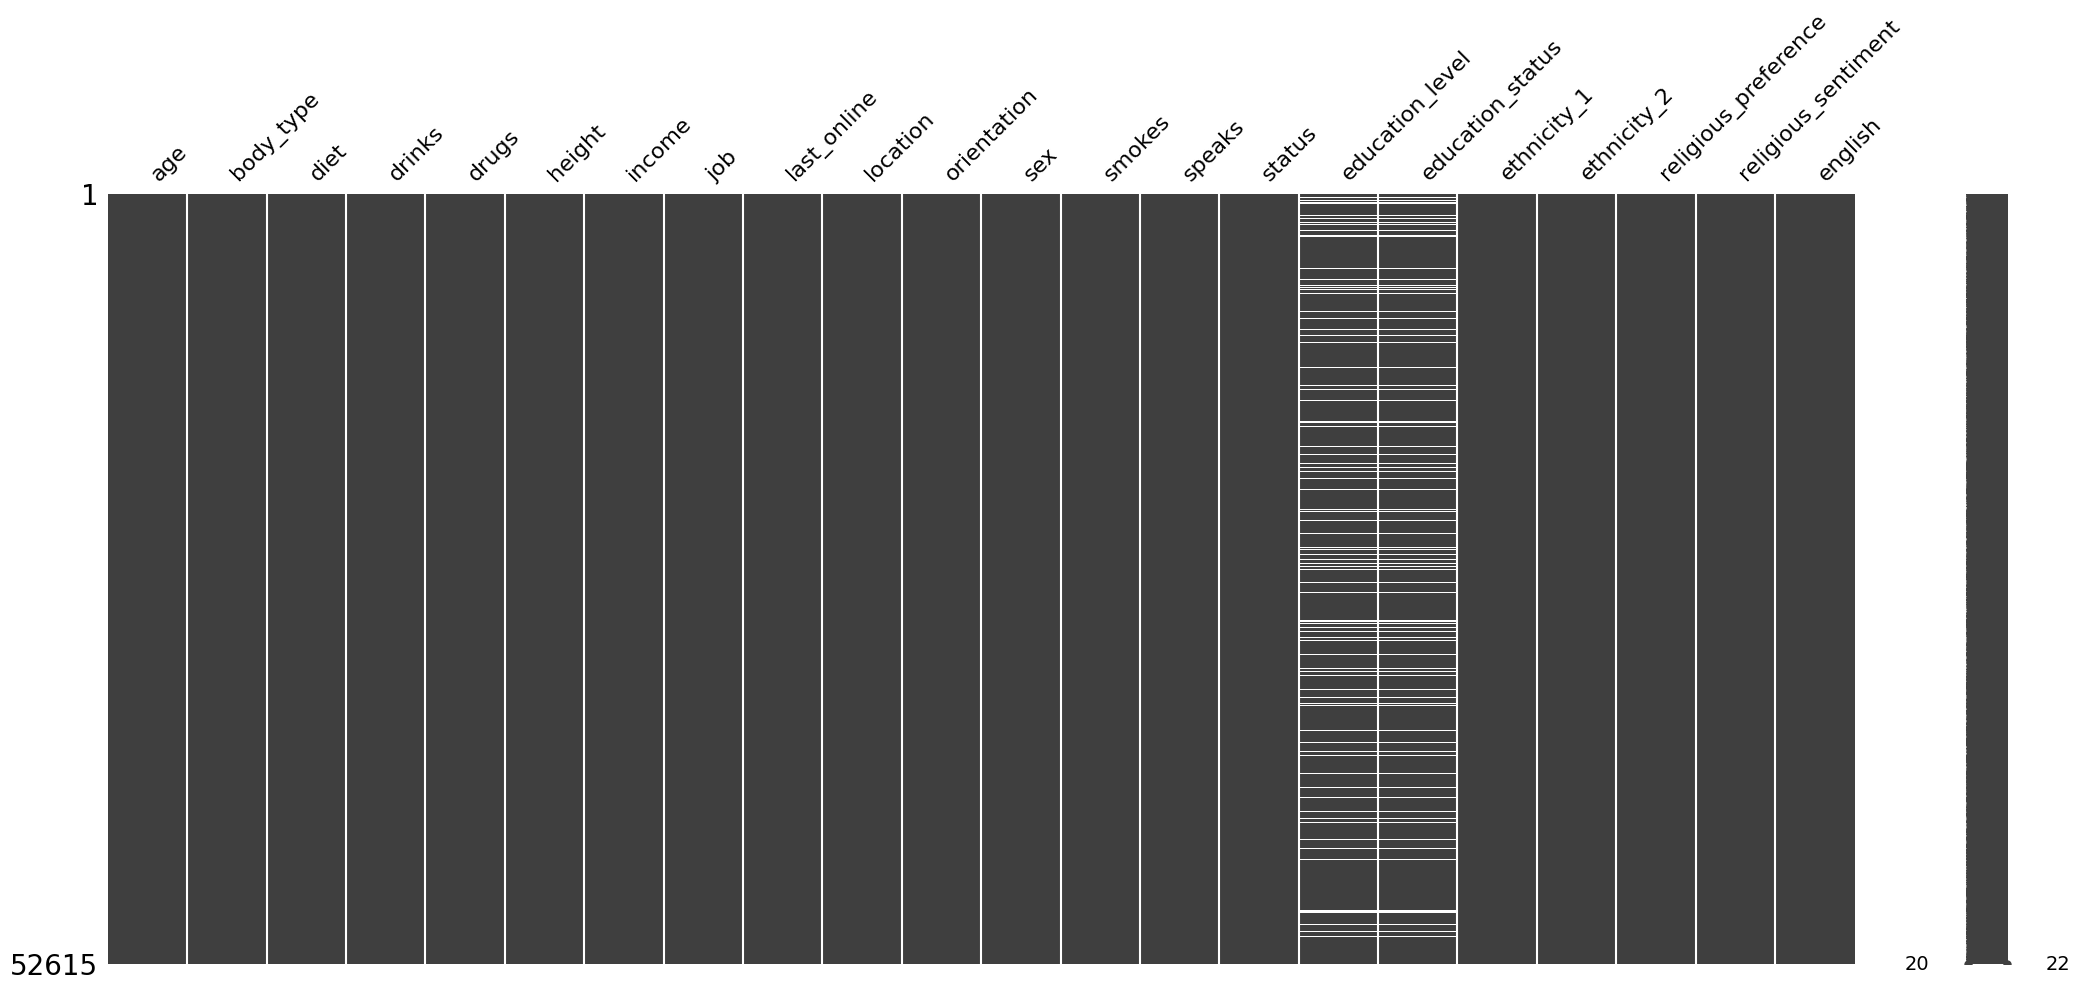

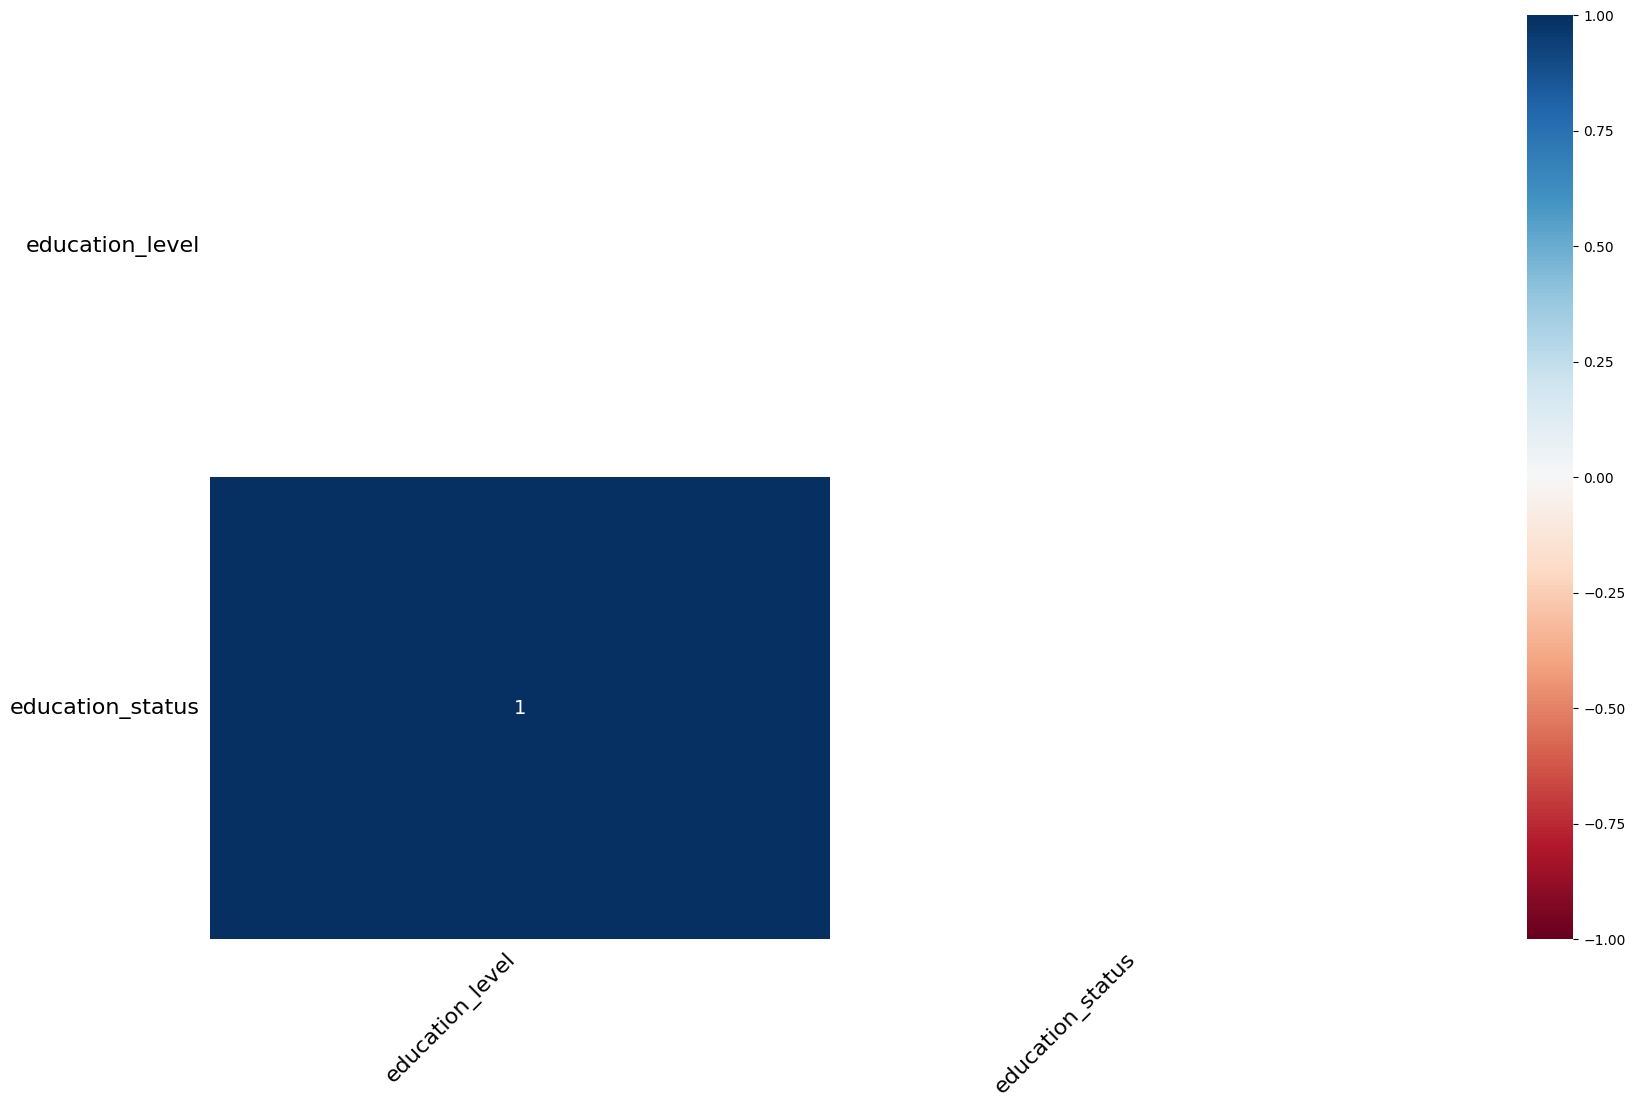

In [ ]:
import missingno as msno

msno.matrix(profiles)
plt.show()

msno.heatmap(profiles)
plt.show()

### Removing High Null Rows

In [ ]:
print("DataFrame shape prior to removal: ", profiles.shape)
profiles['null_count'] = profiles.isna().sum(axis = 1)
profiles = profiles[profiles['null_count'] < (0.4 * profiles.shape[1])]
profiles.drop(columns = ['null_count'], inplace = True)
print("DataFrame shape post removal: ", profiles.shape)

DataFrame shape prior to removal:  (53951, 27)
DataFrame shape post removal:  (52670, 27)


### Handling `height` nulls

`height` only has 2 null values so it's debatable if we should just get rid of them (it is only just 3 rows right?) This method is called **listwise deletion**.

In [ ]:
profiles = profiles[~profiles['height'].isna()]

### Handling `english` Nulls

`english` is also low enough to be handled by **listwise deletion**.

In [ ]:
profiles = profiles[~profiles['english'].isna()]

### Handling `drinks` nulls

In [ ]:
profiles['drinks'] = profiles['drinks'].fillna('rather not say')

### Handling `body_type` nulls

All nulls in the body type column are replaced with average. This is done as the majority of people would have the average body type anyway.

Note: Think about this assumption more critically.

Note: This is an assumption, put it in the assumptions section

In [ ]:
profiles['body_type'] = profiles['body_type'].fillna('average')

### Handling `smokes` nulls

In [ ]:
profiles['smokes'] = profiles['smokes'].fillna('rather not say')

### Handling `ethnicity_1` and `ethnicity_2` nulls

In [ ]:
profiles['ethnicity_1'] = profiles['ethnicity_1'].fillna('unspecified')
profiles['ethnicity_2'] = profiles['ethnicity_2'].fillna('unspecified')

### Handling `education_status` and `education level` nulls

In [ ]:
print(profiles.education_level.value_counts(dropna = False))
profiles.education_status.value_counts(dropna = False)

education_level
college/university    28205
masters                9807
<NA>                   4862
two-year college       2679
ph.d                   2138
high school            1533
space camp             1510
law school             1278
med school              621
Name: count, dtype: int64


education_status
graduated      36505
working on      9381
<NA>            4862
dropped out     1885
Name: count, dtype: int64

### Handling `job` nulls

In [ ]:
profiles['job'] = profiles['job'].fillna('unspecified')

### Handling `sign_sentiment` and `star_sign` nulls

In [ ]:
profiles.drop(columns = ['sign_sentiment', 'star_sign'], inplace = True)

### Handling `drugs` nulls

In [ ]:
profiles['drugs'] = profiles['drugs'].fillna('unspecified')

### Handling `dogs` and `cats`

In [ ]:
profiles.drop(columns = ['dogs', 'cats'], inplace = True)

### Handling `religous_sentiment` and `religous_preference` nulls

In [ ]:
profiles['religious_sentiment'] = profiles['religious_sentiment'].fillna('not specified')
profiles['religious_preference'] = profiles['religious_preference'].fillna('not specified')

### Handling `diet` nulls

In [ ]:
profiles['diet'] = profiles['diet'].fillna('missing')

In [ ]:
profiles.drop(columns = ['offspring'], inplace = True)

## Handling Outliers

### Handling `age` outliers

In [ ]:
profiles.dtypes[profiles.dtypes == pd.Int64Dtype()]

Series([], dtype: object)

In [ ]:
#age is numerical so describe should give us a good idea of the distribution of the values (we already know the age column contains no nulls)
profiles['age'].describe()

count    52633.000000
mean        32.363821
std          9.446285
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        109.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

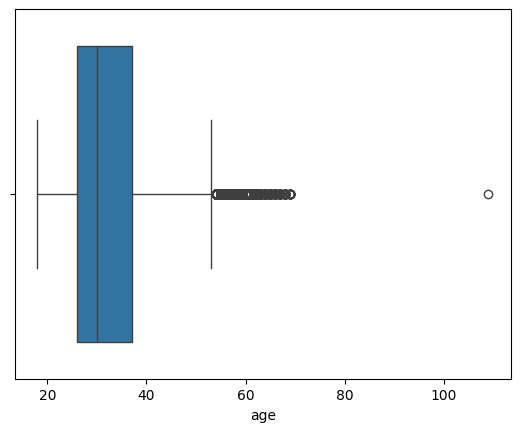

In [ ]:
sns.boxplot(data = profiles, x = 'age')

In [ ]:
#ages above 100 are removed
profiles = profiles[profiles["age"] <= 100]
profiles['age'].describe() #resulting distribution looks a lot more realistic

count    52632.000000
mean        32.362365
std          9.440466
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max         69.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

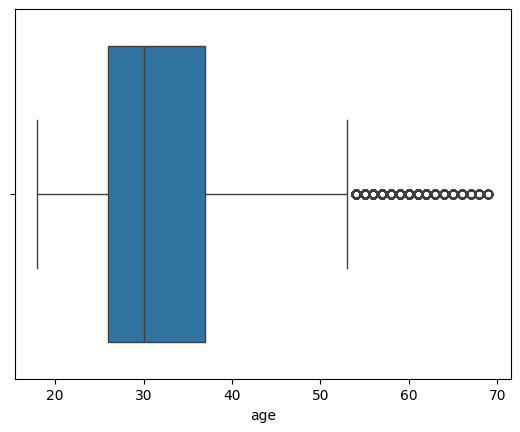

In [ ]:
sns.boxplot(data = profiles, x = 'age')

### Handling `height` Outliers

Next is handling height, and taking a look immediately at the results of the `.describe()` method we can see  a big problem. our min height is someone who claims to be one inch tall. Moving on to the box plot we can see that a few people are also claiming to have a height smaller than the smallest person in the world Chandra Bahadur Dangi who is 21.5 inches tall. So let's immediately remove these jokers from our dataset.

In [ ]:
profiles['height'].describe()

count    52632.000000
mean        68.289178
std          3.987694
min          1.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64

<Axes: xlabel='height'>

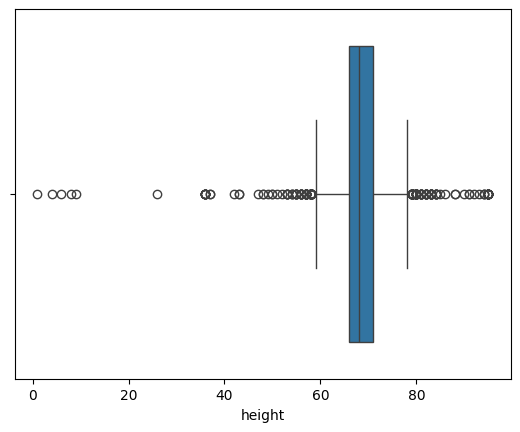

In [ ]:
sns.boxplot(data = profiles, x = 'height')

In [ ]:
profiles = profiles[profiles["height"] >= 40]
profiles['height'].describe()

count    52615.000000
mean        68.302651
std          3.909330
min         42.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64

### Handling `income` outliers

One Thing we can notice about our income attributre is that most of our entries are in the category -1

In [ ]:
profiles.income.value_counts()

income
-1          42360
 20000       2626
 100000      1447
 80000        979
 30000        943
 40000        894
 50000        877
 60000        667
 70000        628
 150000       574
 1000000      450
 250000       129
 500000        41
Name: count, dtype: int64

In [ ]:
profiles.loc[profiles['income'] == -1, 'income'] = 0

### Handling Inconsistent Variables

In [ ]:
profiles.location.value_counts(dropna = False)

location
san francisco, california     27336
oakland, california            6298
berkeley, california           3723
san mateo, california          1173
palo alto, california           937
                              ...  
canyon country, california        1
costa mesa, california            1
honolulu, hawaii                  1
murfreesboro, tennessee           1
leander, texas                    1
Name: count, Length: 189, dtype: int64

### Body Type Variation

As we can see most people on the site consider themselves to be either average or fit/athletic, you would expect this as most people with societaly dictated "negative" body type would not be confident enough to be on a dating website or less likely to report this feature of themselves accurately. 

In [ ]:
profiles['body_type'].value_counts(dropna = False)

body_type
average           17281
fit               11285
athletic          10409
thin               4166
curvy              3481
a little extra     2339
skinny             1554
full figured        870
overweight          385
jacked              368
used up             307
rather not say      170
Name: count, dtype: int64

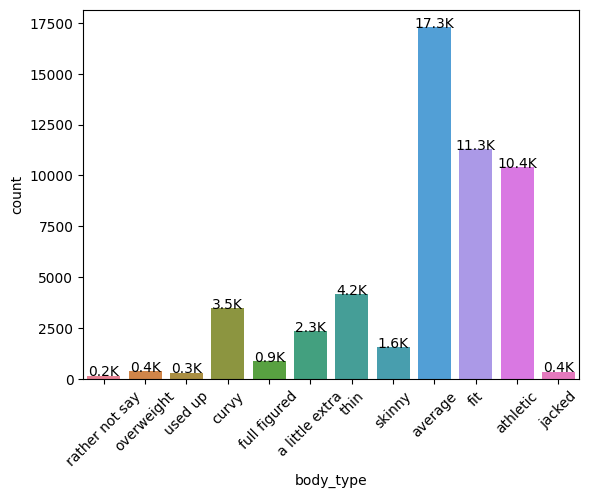

In [ ]:
#My order is based on my own determination of a logical order for the available values for body_type based on my own perception of less fit to most fit
my_order = ['rather not say', 'overweight', 'used up', 'curvy', 'full figured', 'a little extra', 'thin', 'skinny', 'average', 'fit', 'athletic', 'jacked']
ax = sns.countplot(data = profiles, x = 'body_type', hue = 'body_type', order = my_order, hue_order = my_order)

#Just wanted to put in the count values on top of each bar so as to better interpret the data for ease of interpretability. This is all done in 1000s points for fit.
for axi in ax.patches:
    height = axi.get_height()
    ax.text(axi.get_x()+axi.get_width()/2.,
            height + 3,
            f'{round(axi.get_height() / 1000, 1)}K',
            ha="center")

#rotate labels for no overlap     
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

plt.show()

### Handling Diet Nulls

So when we look at the diet data we see that a wopping 68% of the data is NA so our users didnt specify diet data.

It would be best to keep set nulls as a new category ("not specified")

In [ ]:
###### I FIND THIS INSUFFICIENT ######
# Probably want to compare the distribution of missing values according to age (maybe other variables) and present values to see if this missingness is actually random 
profiles['diet'] = profiles['diet'].fillna('anything')

### Diet Variation

Most people on the site expectedly have little to no dietary restriction or preference. Neglibile amounts of people on the dating site conform to religious diets (Maybe our site isn't that appealling to a religious audience)

In [ ]:

profiles['diet'].value_counts(dropna= False)

diet
anything      24900
missing       20855
vegetarian     4455
other          1583
vegan           647
kosher          105
halal            70
Name: count, dtype: int64

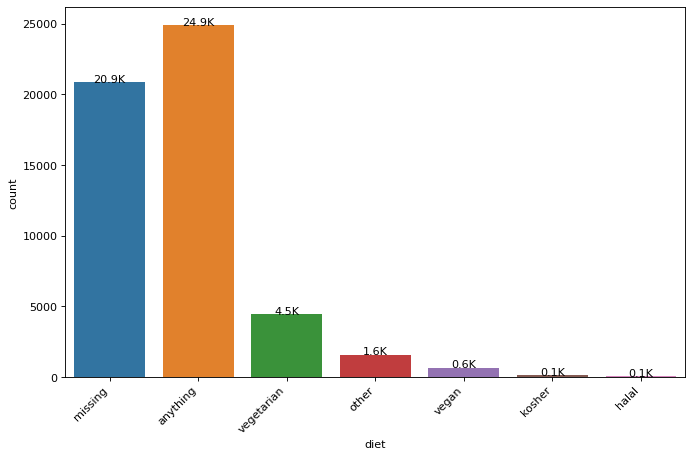

In [ ]:
plt.figure(figsize=(10,6), dpi=80)

ax = sns.countplot(data = profiles, x = 'diet', hue = 'diet')

#Just wanted to put in the count values on top of each bar so as to better interpret the data for ease of interpretability. This is all done in 1000s points for fit.
for axi in ax.patches:
    height = axi.get_height()
    ax.text(axi.get_x()+axi.get_width()/2.,
            height + 3,
            f'{round(axi.get_height() / 1000, 1)}K',
            ha="center")

#rotate labels for no overlap     
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, ha = "right", x = -0.1)

plt.show()

###  Handling Drinks and Drugs Nulls

So we have a few missing drugs and less amount of missing drinks. This would be a good time to test if people are just leaving the field empty for personal reasons or is it just random?

From looking at the p values of the prevalence of drinks and drugs with other factors such as age, sex, income, edication and religion. 

1. We can see that people with certain religious beliefs are likely to skip drug related questions and to a lesser extent drink related questions.
2. Socioeconomic and demograpgic factors influence response rates for these attributes

In [ ]:
from scipy.stats import chi2_contingency

def chi_square_missing(profiles, missing_col, categorical_col): # < 0.05 returned suggests MAR
    profiles_copy = profiles.copy()
    profiles_copy['missing'] = profiles_copy[missing_col].isna().astype(int)

    contingency_table = pd.crosstab(profiles_copy['missing'], profiles_copy[categorical_col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    return p

for col in ['age', 'sex', 'education', 'income', 'religion']:
    p_value = chi_square_missing(profiles, 'drugs', col)
    print(f"Missingness in drugs vs. {col}: p-value = {p_value}")

    p_value = chi_square_missing(profiles, 'drinks', col)
    print(f"Missingness in drinks vs. {col}: p-value = {p_value}")

Missingness in drugs vs. age: p-value = 1.0
Missingness in drinks vs. age: p-value = 1.0
Missingness in drugs vs. sex: p-value = 1.0
Missingness in drinks vs. sex: p-value = 1.0


KeyError: 'education'

### Drink and Drugs Variation

While the drinks attribute has a 

In [ ]:
print(profiles['drugs'].value_counts(dropna = False), "\n")
print(profiles['drinks'].value_counts(dropna = False))

In [ ]:
ax = sns.countplot(data = profiles[profiles['drugs'] != 'never'], x = 'drinks', hue = 'drugs', )
plt.show()

### Education Variation

This attribute is need of serious cleaning!

In [ ]:
edu_desc = profiles['education'].describe()
print(edu_desc)
profiles['education'].value_counts()